# Image visualization and processing 
Here we will look at some basic python libraries for image visualization and processing


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
# pip 
from PIL import Image

folder = '/home/dzyga/My/Python/VillaStellarum/'
fname = 'test1.jpg'

im = Image.open(os.path.join(folder, fname))
width, height = im.width, im.height

im.show()

In [5]:
im.resize((width//2, height//2)).rotate(45).show()

## Matplotlib

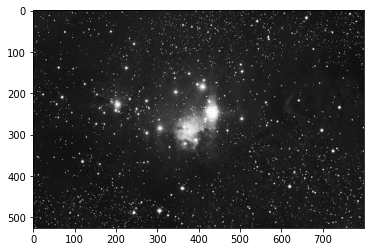

In [20]:
im1 = plt.imread(os.path.join(folder, fname))
plt.imshow(im1[:,:,2], cmap='gray')

In [17]:
im1[:5, :5, 0]

array([[100, 102, 103, 103, 102],
       [101, 103, 106, 106, 105],
       [105, 106, 107, 106, 104],
       [109, 107, 105, 102, 101],
       [106, 105, 103, 102, 102]], dtype=uint8)

## Astropy  

...

In [21]:
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture

In [23]:
## Source Detection (photutils.detection)¶
from photutils import DAOStarFinder, IRAFStarFinder
from photutils import datasets
from astropy.stats import sigma_clipped_stats

hdu = datasets.load_star_image() 
data = hdu.data[0:401, 0:401] 

In [24]:
mean, median, std = sigma_clipped_stats(data, sigma=3.0)  
print((mean, median, std)) 

(3668.09661145823, 3649.0, 204.41388592022315)


(<AxesSubplot:title={'center':'data - median'}>,
 Text(0.5, 1.0, 'data - median'))

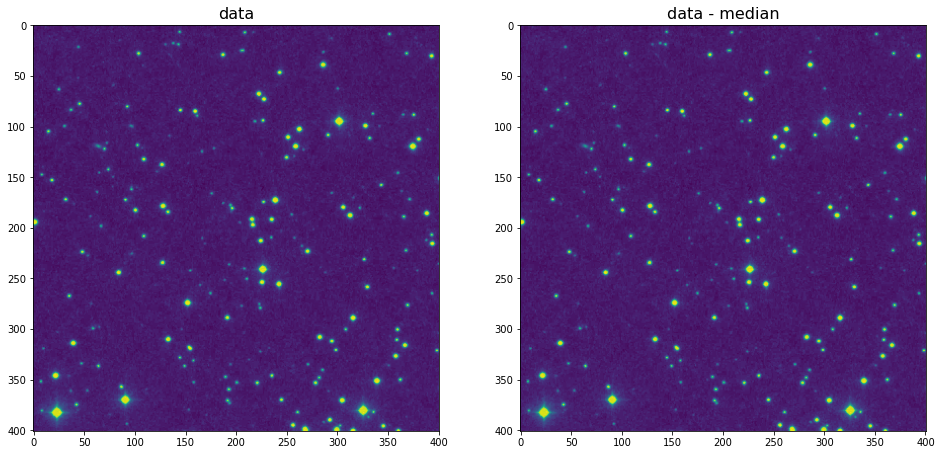

In [27]:
plt.figure(figsize=(16,14))
plt.subplot(1,2,1), plt.imshow(data), plt.title('data', fontsize=16)
plt.subplot(1,2,2), plt.imshow(data-median), plt.title('data - median', fontsize=16)

In [28]:
# Detecting stars in an image using the DAOFIND (Stetson 1987) algorithm.
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
irafind = IRAFStarFinder(fwhm=3.0, threshold=5.*std)  

sources = daofind(data - median) 

# in astropy table format 
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,144.24756716358587,6.379790427039487,0.581562572827351,0.20351243921327303,-0.008218802892450005,25,0.0,6903.0,5.697674747033558,-1.8892441345470474
2,208.6690686281792,6.820580537772934,0.4834896621056071,-0.1258513845127494,-0.030811133499252626,25,0.0,7896.0,6.7186387597593855,-2.068203227645954
3,216.9261366551006,6.577593319804561,0.6935952537974457,-0.7066463231274732,-0.09608868795149346,25,0.0,2195.0,1.666276361241887,-0.5543675830260217
4,351.6251903825918,8.545901323298796,0.4857783367255097,-0.3415136001780068,0.015124942367867503,25,0.0,6977.0,5.897038488883237,-1.926584905867721
5,377.5199099575159,12.065500998677424,0.5203848768638656,0.3697156214358132,-0.06508248006732108,25,0.0,1260.0,1.1178252309515635,-0.12093477013157067
6,294.2728404665307,12.73719125082539,0.6802189159891782,0.1063122817452854,-0.34450090199581346,25,0.0,2059.0,1.4809613010679816,-0.42635927535059515
7,85.21772831944668,14.710346834511745,0.6239413376136589,-0.9271791695140748,-0.27457394024100784,25,0.0,1458.0,1.245708131434075,-0.238540748352036
8,137.94128566136274,17.46471840389003,0.5434054841712598,0.09943769590542942,0.003637283068126533,25,0.0,5451.0,4.683306866094608,-1.6763815378917348
9,130.32797244529527,18.678087427830548,0.6272398684327362,0.1792346308547009,0.00847608979706669,25,0.0,3432.0,2.864122196119612,-1.1424788573859488


In [29]:
type(sources)

astropy.table.table.Table

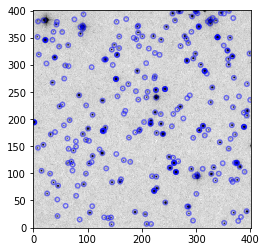

In [33]:
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
apertures.plot(color='blue', lw=1.5, alpha=0.5)

In [31]:
positions

array([[144.24756716,   6.37979043],
       [208.66906863,   6.82058054],
       [216.92613666,   6.57759332],
       [351.62519038,   8.54590132],
       [377.51990996,  12.065501  ],
       [294.27284047,  12.73719125],
       [ 85.21772832,  14.71034683],
       [137.94128566,  17.4647184 ],
       [130.32797245,  18.67808743],
       [143.1104993 ,  18.62355307],
       [382.68247831,  19.49335291],
       [ 44.35428651,  21.2820759 ],
       [206.23159322,  24.72782798],
       [286.27915895,  26.23248971],
       [103.96803204,  27.58782106],
       [368.55196879,  27.54673752],
       [187.26383291,  28.89539813],
       [393.09224753,  30.08905031],
       [108.39448391,  39.37012595],
       [283.47685617,  38.75542528],
       [285.71302358,  38.65312198],
       [ 59.29815762,  40.09264124],
       [243.18729516,  46.30061029],
       [ 44.01174147,  51.64684004],
       [ 78.76411657,  58.53768875],
       [300.40044767,  62.06085172],
       [ 25.23664387,  62.81829511],
 

## OpenCV  

In [36]:
#!pip install opencv-python
import cv2

In [37]:
# Source of image
folder = '/home/dzyga/My/Python/VillaStellarum/'
fname = 'test1.jpg'
file = folder + fname 

#### Color spaces transformation

In [39]:
img = cv2.imread(file)
# COLOR_BGR 

numpy.ndarray

In [40]:
# HSV 
hsvimg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
himg = hsvimg[:,:,0]
simg = hsvimg[:,:,1]
vimg = hsvimg[:,:,2]

In [41]:
# function for arbitary number of image to show
def show_images(img_dict):  
    """from img_dict = {'title': image} input create a subplots
    Ex.: show_image('rgb' = img, 'hsv' = hsvimg, 'mask'= mask)  """
    N = len(img_dict)
    fig, ax = plt.subplots(1, N, figsize = (16, 12))
    i = 0
    for text, image in img_dict.items(): 
        ax[i].imshow(image)
        ax[i].set_title(text)
        ax[i].axis('off');
        i+=1
    plt.show()

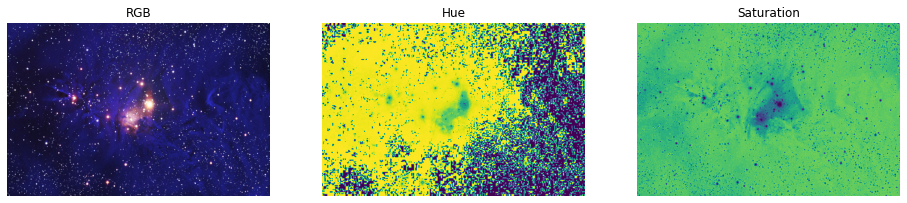

In [28]:
img_dict = {'RGB':img, 'Hue':himg, 'Saturation':simg}
show_images(img_dict)

## Skimage 


Gallery: 
https://scikit-image.org/docs/dev/auto_examples/index.html

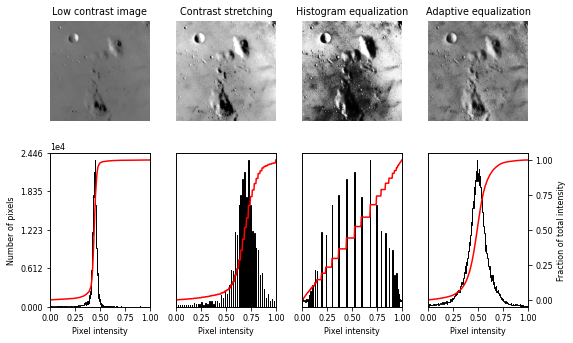

In [42]:
# Histogram stretching

import matplotlib

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()


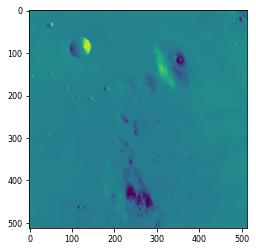

In [44]:
# Load an example image
img = data.moon()
plt.imshow(img)

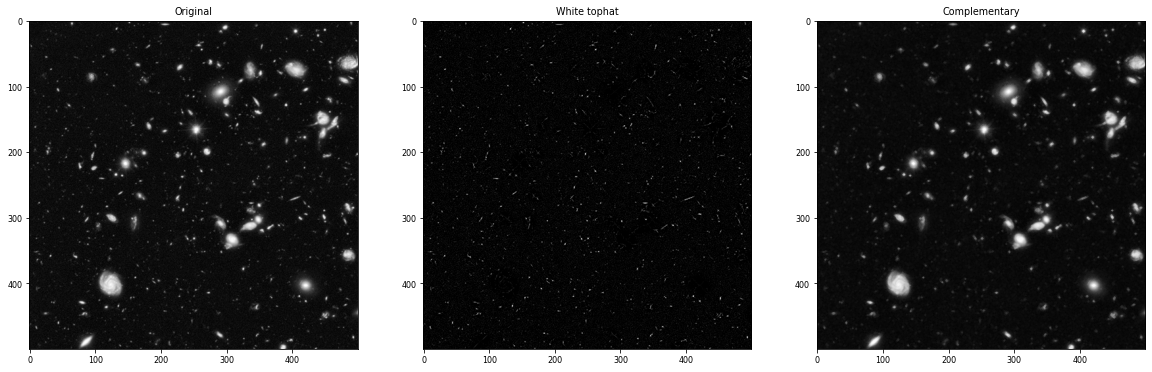

In [49]:
# Removing small objects in grayscale images with a top hat filter¶
from skimage import data
from skimage import color, morphology

data_hub = data.hubble_deep_field()

image = color.rgb2gray(data_hub)[:500, :500]

selem =  morphology.disk(1)
res = morphology.white_tophat(image, selem)

fig, ax = plt.subplots(ncols=3, figsize=(20, 8))
ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')
ax[1].set_title('White tophat')
ax[1].imshow(res, cmap='gray')
ax[2].set_title('Complementary')
ax[2].imshow(image - res, cmap='gray')